In [0]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
import re
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('London_hotel_reviews.csv', encoding = "ISO-8859-1")
print(df.shape)
df.head()

(27330, 6)


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",6/2/2012
4,The Savoy,5,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017


In [0]:
print(df.isna().sum(), end = '\n\n')
df[df.isnull().any(axis=1)].head()

Property Name                  0
Review Rating                  0
Review Title                   0
Review Text                    0
Location Of The Reviewer    3953
Date Of Review                 1
dtype: int64



,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
5,Corinthia Hotel London,1,Staff stole from me!!,Well I am no strange to London's 5star hotels ...,NaN,3/1/2013
24,Mondrian London at Sea Containers,5,"Fantastic nights stay, one of the best hotels ...",My partner and I found this hotel by chance an...,NaN,6/20/2015
34,Mondrian London at Sea Containers,5,Just as good second time around!,After an amazing experience the first time we ...,NaN,10/15/2015
37,The Rembrandt,5,Good Hotel - Great Area,Very good hotel in a lovely area. Handy to the...,NaN,11/4/2016
45,Apex London Wall Hotel,4,Eccellente,"In tutto, dalla struttura nuova in stile moder...",NaN,4/30/2013


In [0]:
df[df["Date Of Review"].isnull()]

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
6556,The Lanesborough,4,<U+0412> <U+043F><U+043E><U+0434><U+0440><U+04...,<U+041E><U+0442><U+0435><U+043B><U+044C> : | <...,NaN,NaN


In [0]:
print(len(df[df['Review Title'].str.contains("<U")]), 'reviews that are probably gibberish.')
df[df['Review Title'].str.contains("<U")].head()

431 reviews that are probably gibberish.


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
90,The Dorchester,5,<U+0391><U+03B3><U+03B3><U+03BB><U+03B9><U+03B...,e<U+03B9><U+03BD>a<U+03B9> e<U+03BD>a<U+03C2> ...,"Athens, Greece",7/18/2017
174,Corinthia Hotel London,5,<U+041B><U+0443><U+0447><U+0448><U+0438><U+043...,<U+0423><U+0440><U+043E><U+0432><U+0435><U+043...,Zurich,2/17/2016
178,"Mandarin Oriental Hyde Park, London",5,<U+512A><U+96C5><U+306A><U+6642><U+9593><U+304...,<U+5148><U+6708><U+3001><U+304A><U+98DF><U+4E8...,"Aichi Prefecture, Japan",11/20/2015
328,The Savoy,5,<U+C544><U+B984><U+B2F5><U+ACE0> <U+C6B0><U+C5...,<U+CE5C><U+C808><U+D558><U+ACE0> <U+C720><U+CF...,NaN,5/15/2017
364,45 Park Lane - Dorchester Collection,5,<U+041C><U+043E><U+0434><U+043D><U+044B><U+043...,<U+041E><U+0442><U+0435><U+043B><U+044C> <U+04...,"Moscow, Russia",9/1/2015


In [0]:
df = df[df['Review Title'].str.contains("<U") == False]

[Text(0, 0, 'The Savoy'),
 Text(0, 0, 'Mondrian London at Sea Containers'),
 Text(0, 0, 'The Rembrandt'),
 Text(0, 0, 'Corinthia Hotel London'),
 Text(0, 0, 'Apex London Wall Hotel'),
 Text(0, 0, 'The Dorchester'),
 Text(0, 0, 'Rhodes Hotel'),
 Text(0, 0, 'Hotel Xenia, Autograph Collection'),
 Text(0, 0, 'Ridgemount Hotel'),
 Text(0, 0, 'Mandarin Oriental Hyde Park, London'),
 Text(0, 0, 'Bulgari Hotel, London'),
 Text(0, 0, 'The Wellesley Knightsbridge, a Luxury Collection Hotel, London'),
 Text(0, 0, 'The Lanesborough'),
 Text(0, 0, 'London Guest House'),
 Text(0, 0, 'Newham Hotel'),
 Text(0, 0, 'A To Z Hotel'),
 Text(0, 0, '45 Park Lane - Dorchester Collection'),
 Text(0, 0, 'Hartley Hotel'),
 Text(0, 0, 'Marble Arch Hotel'),
 Text(0, 0, 'City View Hotel')]

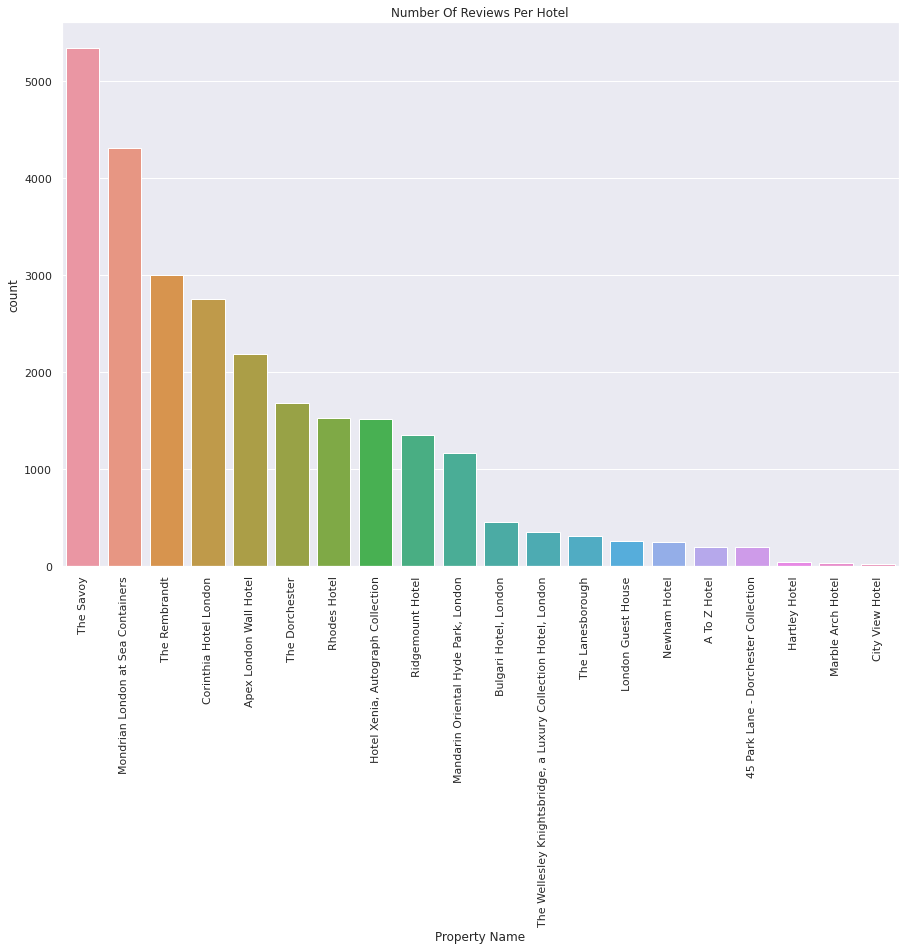

In [0]:
sns.set(rc={'figure.figsize':(15,10)}) # this will set the size of all the following graphs (default is too small)
grid = sb.countplot(x = 'Property Name', data = df, order = df['Property Name'].value_counts().index)
grid.set_title('Number Of Reviews Per Hotel')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Number Of Ratings')

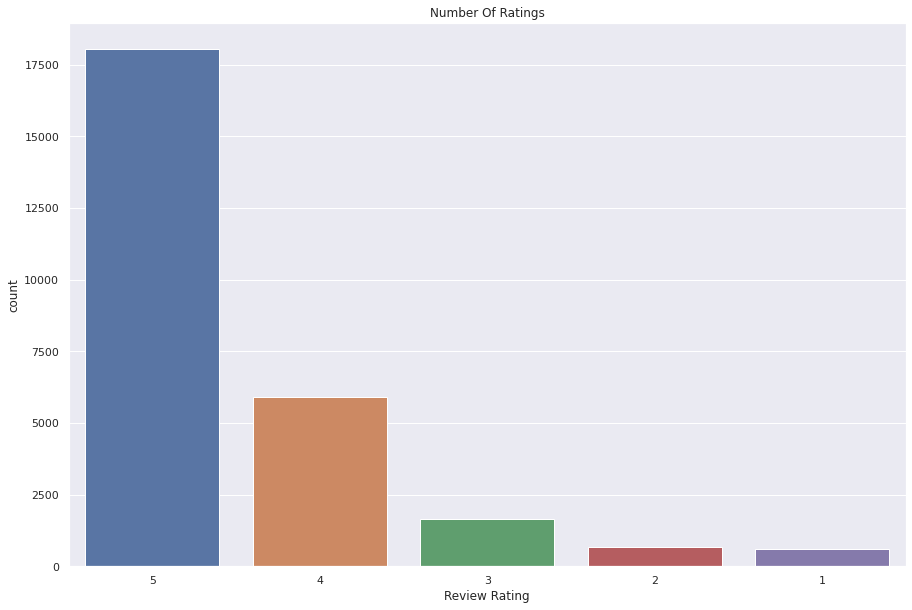

In [0]:
grid = sb.countplot(x = 'Review Rating', data = df, order = df['Review Rating'].value_counts().index)
grid.set_title('Number Of Ratings')

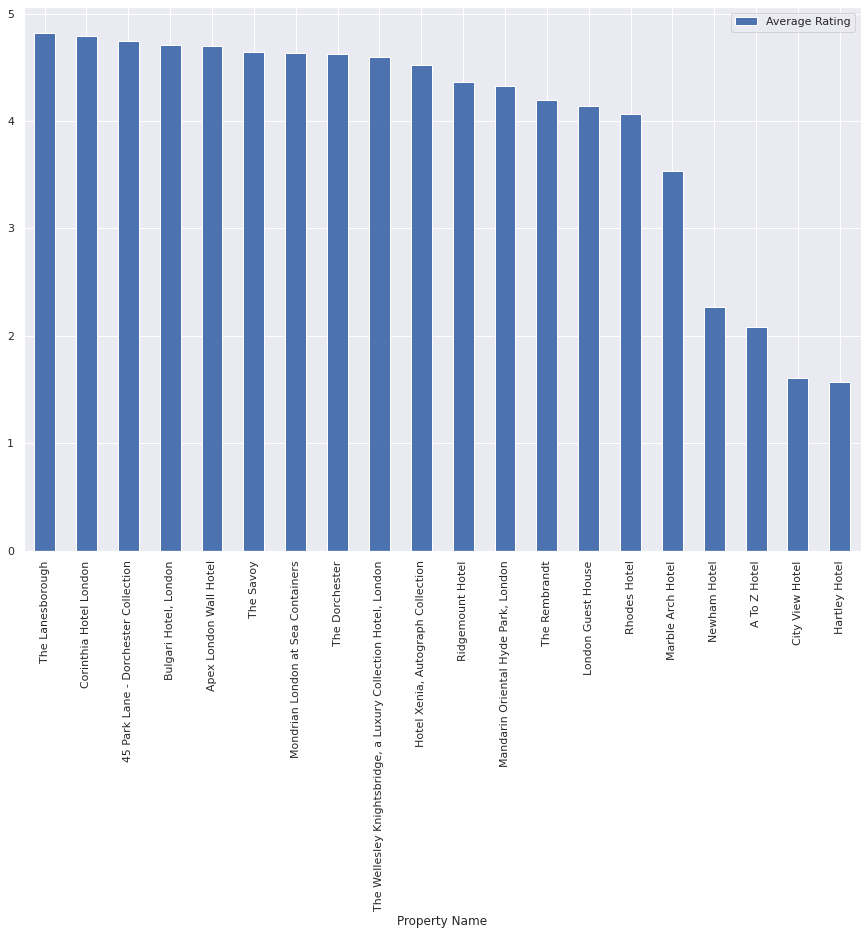

In [0]:
average_rating_df = pd.DataFrame(columns = ['Property Name', 'Average Rating'])
count = 0
for i in df['Property Name'].unique():
    average_rating = sum(df['Review Rating'][df['Property Name'] == i]) / sum(df['Property Name'] == i)
    average_rating_df.loc[count] = [i, average_rating]
    count += 1 
average_rating_df = average_rating_df.sort_values('Average Rating', ascending = False)
average_rating_df.plot(kind = 'bar', x = 'Property Name')

[Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'NA'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'London'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'The Netherlands')]

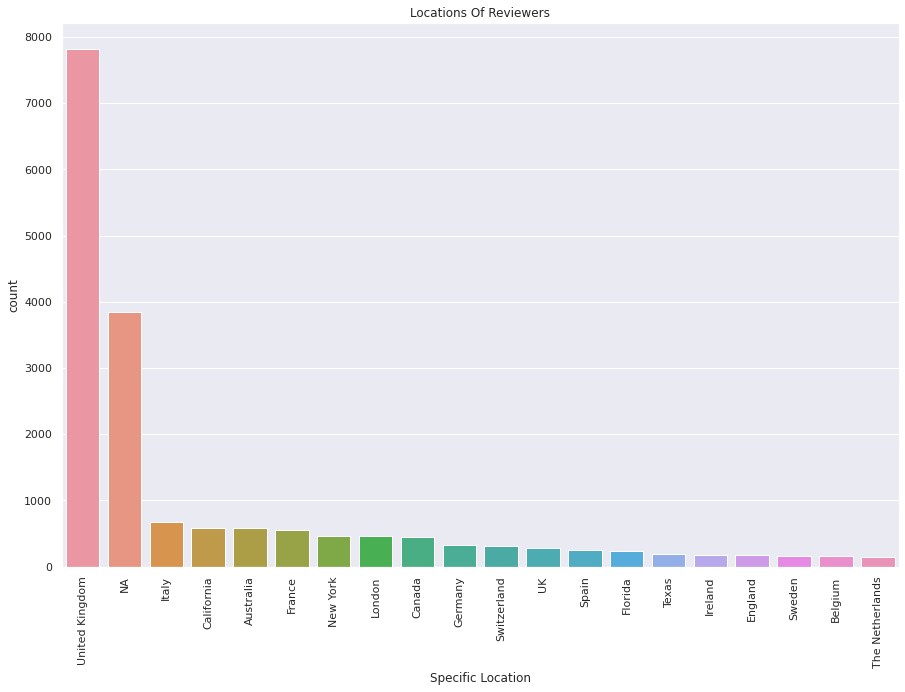

In [0]:
df = df.fillna('NA')  
specific_locations = []
for i in df['Location Of The Reviewer']:
    if ", " not in i:
        specific_locations.append(i)
    else:
        specific_locations.append(i.rsplit(", ", 1)[1])
df['Specific Location'] = specific_locations

grid = sb.countplot(x = 'Specific Location', data = df, order = df['Specific Location'].value_counts().iloc[:20].index)
grid.set_title('Locations Of Reviewers')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

[Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018')]

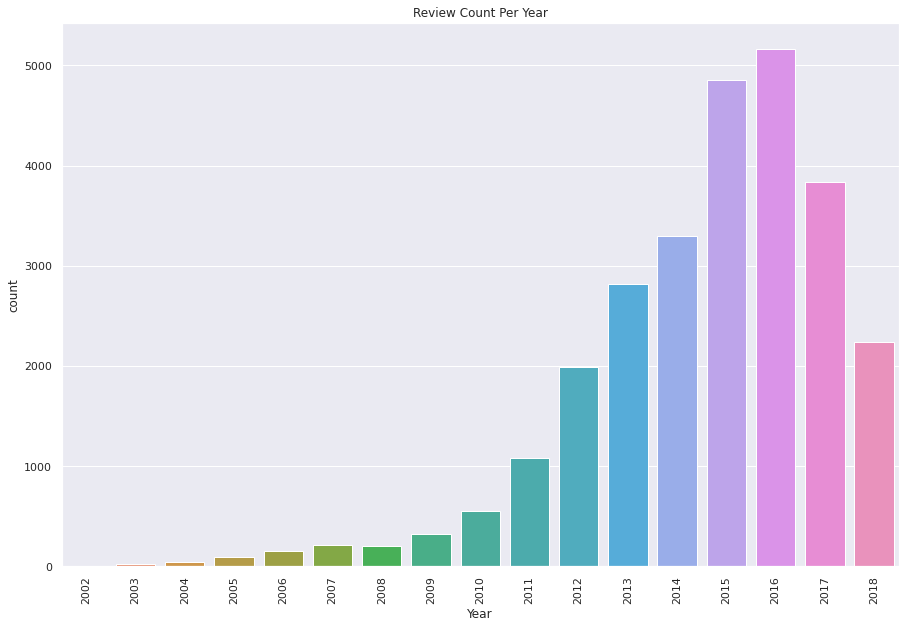

In [0]:
years = []
for i in df['Date Of Review']:
    years.append(i[-4:])
df['Year'] = years
grid = sb.countplot(x = 'Year', data = df)
grid.set_title('Review Count Per Year')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

In [0]:
df['Complete Review'] = df['Review Title'] + ' ' + df['Review Text']
df.loc[df['Review Rating'] > 4, 'Good Review'] = 1
df.loc[df['Review Rating'] <= 4, 'Good Review'] = 0
print(sum(df['Good Review'] == 0) / len(df['Good Review']) * 100, 'percent of reviews are bad (less than 5 star).')

32.874828060522695 percent of reviews are bad (less than 5 star).


In [0]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [0]:
# Data preprocessing ........................................


REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(train['Complete Review'])
reviews_test_clean = preprocess_reviews(test['Complete Review'])

In [0]:
cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)
X_train = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy: 81.71921921921921 %


-----------------------------


Confusion matrix:

[[1201  528]
 [ 446 3153]]
 



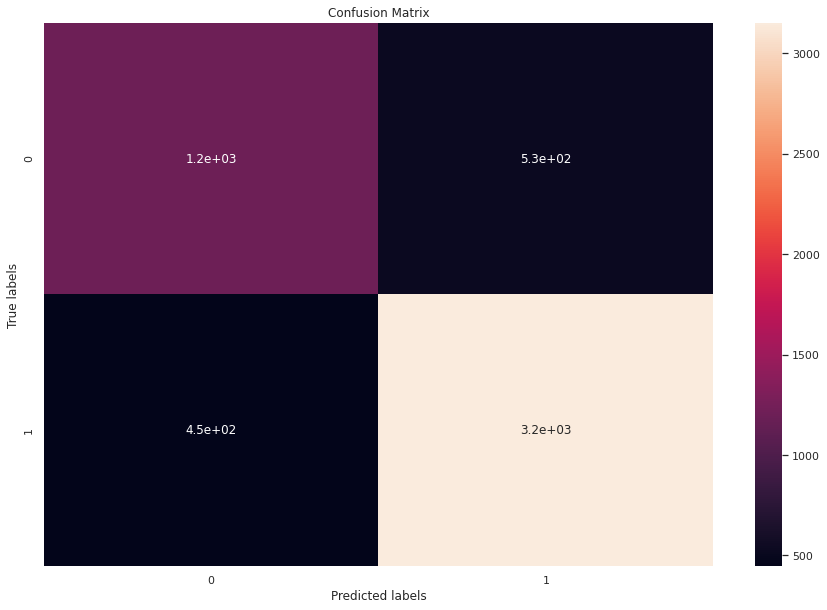

In [0]:
target_train = train['Good Review']
target_test = test['Good Review']

model = LogisticRegression()
model.fit(X_train, target_train)
accuracy= accuracy_score(target_test, model.predict(X_test))
accuracy= accuracy*100
print ("Accuracy: %s" % accuracy,"%\n\n")
import pylab as pl
cf= confusion_matrix(target_test, model.predict(X_test)) 
print("-----------------------------\n\n")
print ("Confusion matrix:\n")
print (cf)
print (" \n")
ax= plt.subplot()
sns.heatmap(cf, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');  

In [0]:
feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), model.coef_[0]
    )
}
print('Good words:', end = " \n\n")
for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:5]:
    print (best_positive)
print('---------------------------------------')
print('Bad words:', end = "\n\n")
for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:5]:
    print (best_negative)

Good words: 

('glazed', 1.5743160369475517)
('speaking', 1.4066185662643438)
('meets', 1.3904816550528192)
('finest', 1.3693877910281087)
('sensitive', 1.3675599278442216)
---------------------------------------
Bad words:

('terrible', -1.830011701705506)
('disappointing', -1.7249931810623313)
('lacking', -1.631165703499475)
('rude', -1.607658852323239)
('lacked', -1.4892140781776477)
